In [1]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [ ]:
raw = np.genfromtxt(
    '/data/November_2025.csv',
    delimiter=',',
    dtype=str,
    skip_header=1
)

In [3]:
raw[raw == ""] = "nan"

dates_str = raw[:,0]
days = np.array([int(d.split('-')[-1]) for d in dates_str])

sleep      = raw[:,1].astype(float)
course     = raw[:,2].astype(float)
curriculum = raw[:,3].astype(float)
leisure    = raw[:,4].astype(float)

In [4]:
# FEATURE ENGINEERING

productive = course + curriculum
focus_ratio = productive / (productive + leisure + 1e-6)
balance = sleep + productive - leisure

# Exam days
exam_days = np.array([14, 15, 17, 19, 29])
is_exam = np.isin(days, exam_days)

In [5]:
# 3. BASIC DESCRIPTIVE STATISTICS

def describe(name, arr):
    print(f"{name}")
    print(" Mean   :", round(np.nanmean(arr),2))
    print(" Median :", round(np.nanmedian(arr),2))
    print(" Std    :", round(np.nanstd(arr),2))
    print(" Min    :", np.nanmin(arr))
    print(" Max    :", np.nanmax(arr))
    print()

print("===== DESCRIPTIVE STATISTICS =====\n")
describe("Sleep", sleep)
describe("Course Study", course)
describe("Curriculum Study", curriculum)
describe("Leisure", leisure)
describe("Total Productive", productive)

===== DESCRIPTIVE STATISTICS =====

Sleep
 Mean   : 6.82
 Median : 6.75
 Std    : 1.87
 Min    : 3.0
 Max    : 9.75

Course Study
 Mean   : 0.73
 Median : 0.5
 Std    : 0.88
 Min    : 0.0
 Max    : 3.0

Curriculum Study
 Mean   : 3.6
 Median : 2.5
 Std    : 3.6
 Min    : 0.0
 Max    : 11.0

Leisure
 Mean   : 6.99
 Median : 7.64
 Std    : 2.91
 Min    : 1.0
 Max    : 11.83

Total Productive
 Mean   : 4.33
 Median : 3.48
 Std    : 3.11
 Min    : 0.0
 Max    : 11.0



In [6]:
# 4. EXAM VS NON-EXAM DAY COMPARISON
# --------------------------------------------

print("===== EXAM VS NON-EXAM DAYS =====\n")

def compare(arr, label):
    print(label)
    print(" Exam days     :", round(np.nanmean(arr[is_exam]),2))
    print(" Non-exam days :", round(np.nanmean(arr[~is_exam]),2))
    print()

compare(sleep, "Sleep")
compare(curriculum, "Curriculum Study")
compare(course, "Course Study")
compare(leisure, "Leisure")
compare(productive, "Total Productive")


===== EXAM VS NON-EXAM DAYS =====

Sleep
 Exam days     : 3.9
 Non-exam days : 7.41

Curriculum Study
 Exam days     : 6.02
 Non-exam days : 3.11

Course Study
 Exam days     : 0.3
 Non-exam days : 0.82

Leisure
 Exam days     : 5.03
 Non-exam days : 7.38

Total Productive
 Exam days     : 6.32
 Non-exam days : 3.93



In [7]:
# 5. CORRELATION MATRIX

print("===== CORRELATION MATRIX =====\n")

data = np.vstack([sleep, course, curriculum, leisure])
labels = ["Sleep", "Course", "Curriculum", "Leisure"]
corr = np.corrcoef(data)

print("        Sleep  Course  Curric  Leisure")
for i, label in enumerate(labels):
    row = " ".join(f"{corr[i,j]:7.2f}" for j in range(len(labels)))
    print(label.ljust(10), row)

===== CORRELATION MATRIX =====

        Sleep  Course  Curric  Leisure
Sleep         1.00    0.37   -0.62    0.51
Course        0.37    1.00   -0.63    0.34
Curriculum   -0.62   -0.63    1.00   -0.85
Leisure       0.51    0.34   -0.85    1.00


In [8]:
# 6. CALENDAR-BASED WEEKLY ANALYSIS

print("\n===== WEEKLY TRENDS (Calendar-Based) =====\n")

cal = calendar.monthcalendar(2025, 11)

for i, week in enumerate(cal):
    valid_days = [d for d in week if d != 0]
    idx = np.where(np.isin(days, valid_days))[0]
    if len(idx) == 0:
        continue

    print(f"Week {i+1} | Days: {valid_days}")
    print(" Sleep     :", round(np.nanmean(sleep[idx]),2))
    print(" Curriculum:", round(np.nanmean(curriculum[idx]),2))
    print(" Course    :", round(np.nanmean(course[idx]),2))
    print(" Leisure   :", round(np.nanmean(leisure[idx]),2))
    print()


===== WEEKLY TRENDS (Calendar-Based) =====

Week 1 | Days: [1, 2]
 Sleep     : 9.38
 Curriculum: 0.0
 Course    : 2.0
 Leisure   : 7.75

Week 2 | Days: [3, 4, 5, 6, 7, 8, 9]
 Sleep     : 8.58
 Curriculum: 1.14
 Course    : 1.04
 Leisure   : 9.08

Week 3 | Days: [10, 11, 12, 13, 14, 15, 16]
 Sleep     : 5.7
 Curriculum: 7.93
 Course    : 0.0
 Leisure   : 3.2

Week 4 | Days: [17, 18, 19, 20, 21, 22, 23]
 Sleep     : 6.36
 Curriculum: 3.54
 Course    : 0.71
 Leisure   : 7.53

Week 5 | Days: [24, 25, 26, 27, 28, 29, 30]
 Sleep     : 5.93
 Curriculum: 2.8
 Course    : 0.82
 Leisure   : 7.95



In [9]:
# 7. BEST / WORST DAYS

print("===== BEST & WORST DAYS =====\n")

best_focus = np.argmax(focus_ratio)
worst_focus = np.argmin(focus_ratio)

print("Most focused day :", dates_str[best_focus], round(focus_ratio[best_focus],2))
print("Least focused day:", dates_str[worst_focus], round(focus_ratio[worst_focus],2))

===== BEST & WORST DAYS =====

Most focused day : 2025-11-11 0.87
Least focused day: 2025-11-21 0.0


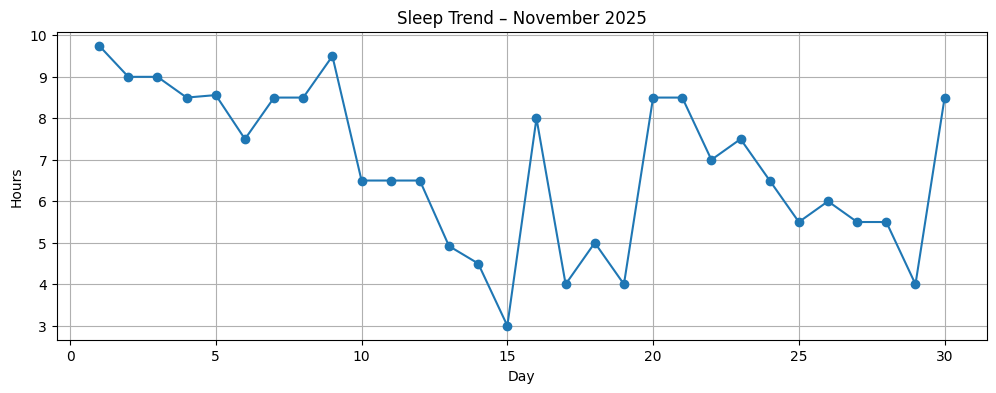

In [10]:
# 8. VISUALIZATIONS

# Sleep trend
plt.figure(figsize=(12,4))
plt.plot(days, sleep, marker='o')
plt.title("Sleep Trend – November 2025")
plt.xlabel("Day")
plt.ylabel("Hours")
plt.grid(True)
plt.show()


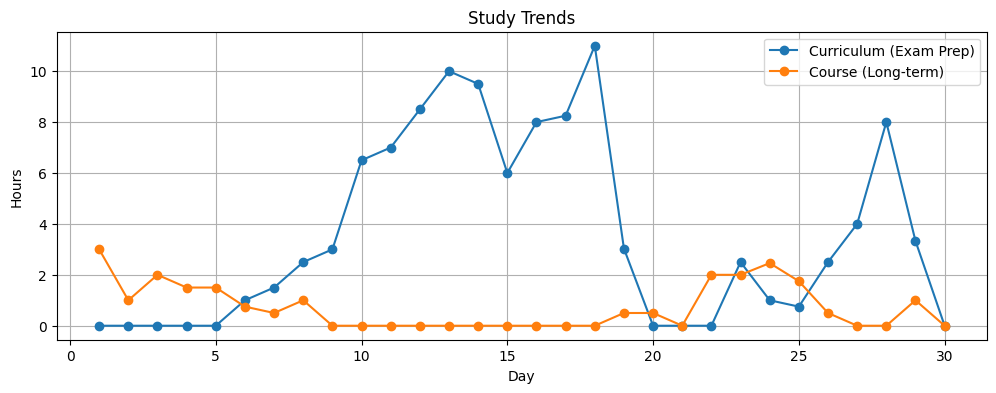

In [11]:
# Study trends
plt.figure(figsize=(12,4))
plt.plot(days, curriculum, label="Curriculum (Exam Prep)", marker='o')
plt.plot(days, course, label="Course (Long-term)", marker='o')
plt.title("Study Trends")
plt.xlabel("Day")
plt.ylabel("Hours")
plt.legend()
plt.grid(True)
plt.show()

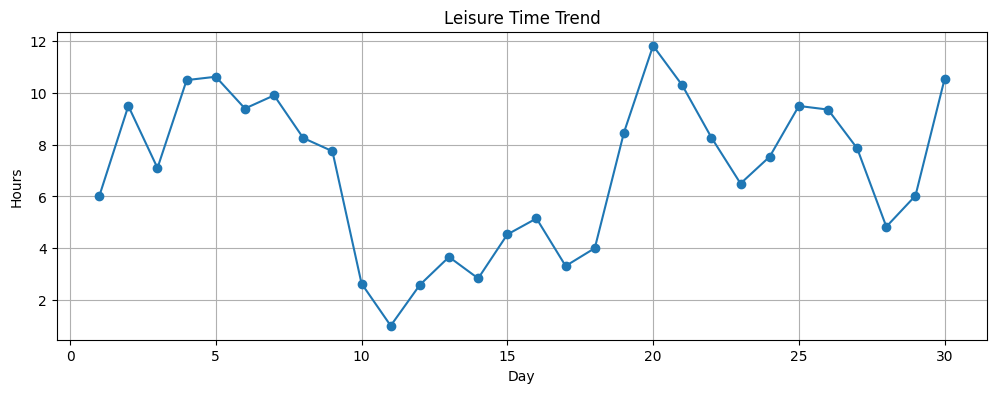

In [12]:
# Leisure trend
plt.figure(figsize=(12,4))
plt.plot(days, leisure, marker='o')
plt.title("Leisure Time Trend")
plt.xlabel("Day")
plt.ylabel("Hours")
plt.grid(True)
plt.show()

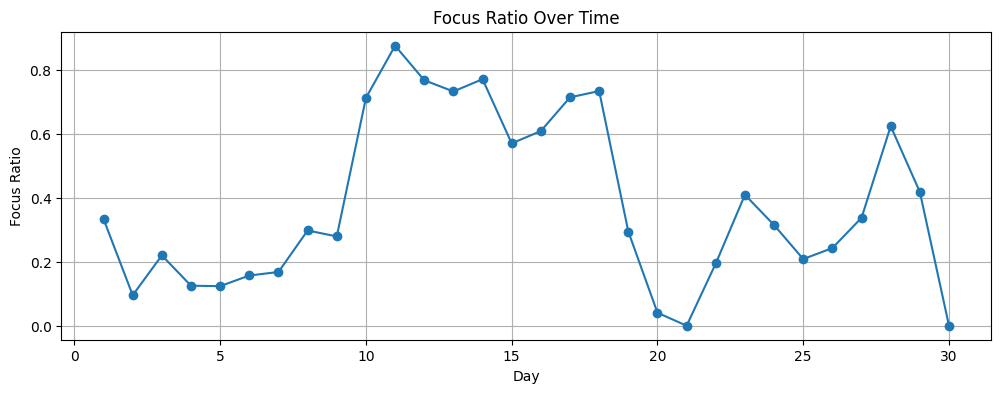

In [13]:
# Focus ratio
plt.figure(figsize=(12,4))
plt.plot(days, focus_ratio, marker='o')
plt.title("Focus Ratio Over Time")
plt.xlabel("Day")
plt.ylabel("Focus Ratio")
plt.grid(True)
plt.show()

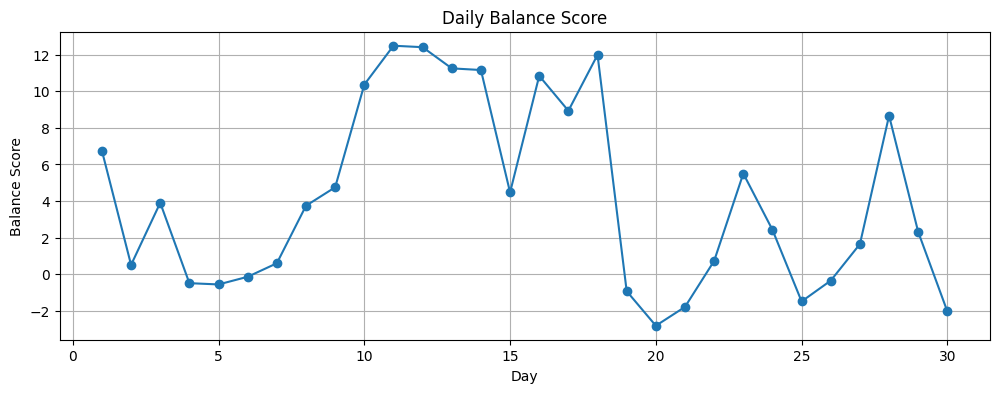

In [14]:
# Balance score
plt.figure(figsize=(12,4))
plt.plot(days, balance, marker='o')
plt.title("Daily Balance Score")
plt.xlabel("Day")
plt.ylabel("Balance Score")
plt.grid(True)
plt.show()

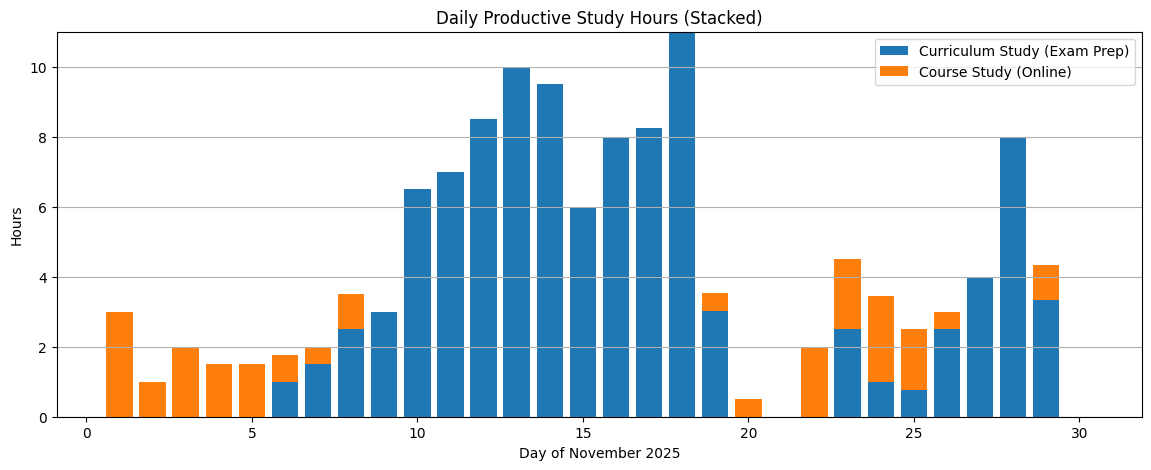

In [17]:
# Total Productive Study Hours
plt.figure(figsize=(14,5))

plt.bar(days, curriculum, label='Curriculum Study (Exam Prep)')
plt.bar(days, course, bottom=curriculum, label='Course Study (Online)')

plt.title("Daily Productive Study Hours (Stacked)")
plt.xlabel("Day of November 2025")
plt.ylabel("Hours")
plt.legend()
plt.grid(axis='y')

plt.show()